<a href="https://colab.research.google.com/github/amolprabhu/Loan-EMI-Default-Payment-Prediction/blob/main/Loan_EMI_Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

## Development of technology has improved customer service to a great extent. Nowadays, customer can purchase products and choose to pay for the product over a period of time, rather than the lump sum amount immediately. Paying over a period of time is mainly done through Equated Monthly Installments (EMI), companies charge a rate of interest for this facilities usually.

## Companies that use EMI as payment option have a known risk in the form of default payments. These default payments can incur a huge loss to companies. To combat this financial agencies in different countries penalise the customers who default payments in terms of reducing their credit score. A lower credit score means it becomes difficult for a customer to borrow from a bank or opt for EMI options easily.

## The main business objective of this project is to predict such default payments of customers by building a machine learning model. This model would help in predicting if a given customer might default his payments or not, when given some features.

# **THE DATA**

## The dataset here is sourced from an Indonesian telecom company which provides loan to its customers in the form of recharge amounts. The data set contains 209593 rows and 37 columns.

## The definitions of the columns are given as follows:

### **label** -	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}.
### **msisdn** -	mobile number of user.
### **aon**	- age on cellular network in days.
### **daily_decr30** - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).
### **daily_decr90** -Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah).
### **rental30** - Average main account balance over last 30 days.
### **rental90** - Average main account balance over last 90 days.
### **last_rech_date_ma** -	Number of days till last recharge of main account.
### **last_rech_date_da**	- Number of days till last recharge of data account.
### **last_rech_amt_ma** - 	Amount of last recharge of main account (in Indonesian Rupiah).
### **cnt_ma_rech30**	- Number of times main account got recharged in last 30 days.
### **fr_ma_rech30** - Frequency of main account recharged in last 30 days.
### **sumamnt_ma_rech30**	- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah).
### **medianamnt_ma_rech30** - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah).
### **medianmarechprebal30** - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah).
### **cnt_ma_rech90** -	Number of times main account got recharged in last 90 days.
### **fr_ma_rech90** - Frequency of main account recharged in last 90 days.
### **sumamnt_ma_rech90**	- Total amount of recharge in main account over last 90 days (in Indonesian Rupiah).
### **medianamnt_ma_rech90** - Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah).
### **medianmarechprebal90** - Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah).
### **cnt_da_rech30**	- Number of times data account got recharged in last 30 days.
### **fr_da_rech30** - Frequency of data account recharged in last 30 days.
### **cnt_da_rech90**	- Number of times data account got recharged in last 90 days.
### **fr_da_rech90** - Frequency of data account recharged in last 90 days.
### **cnt_loans30** - Number of loans taken by user in last 30 days.
### **amnt_loans30** - Total amount of loans taken by user in last 30 days.
### **maxamnt_loans30**	- maximum amount of loan taken by the user in last 30 days.
### **medianamnt_loans30** - Median of amounts of loan taken by the user in last 30 days.
### **cnt_loans90** -	Number of loans taken by user in last 90 days.
### **amnt_loans90** -	Total amount of loans taken by user in last 90 days.
### **maxamnt_loans90**	- maximum amount of loan taken by the user in last 90 days.
### **medianamnt_loans90** - Median of amounts of loan taken by the user in last 90 days.
### **payback30** - Average payback time in days over last 30 days.
### **payback90** -	Average payback time in days over last 90 days.
### **pcircle**	- telecom circle.
### **pdate** -	date.

## **STEPS IN THE PROJECT**:

### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Feature Transformation and Data Preparation
### 4. Model Building
### 5. Model Tuning

In [42]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Importing the data
data = pd.read_csv('/content/drive/MyDrive/Loan EMI Payment Default Detection/sample_data_intw.csv')

In [3]:
# A view of the data
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
# Information of all the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# Description of the data
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


## 1. Data Cleaning

In [6]:
# Dropping the mobile number and index
data.drop(['Unnamed: 0', 'msisdn'], axis = 1, inplace = True)

### The unnamed column and msidn column can be dropped as they do not aid the analysis much.

In [7]:
# Description of the data
data.describe(include ='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


### As seen the data contains values for both 30 and 90 days for all the features. Some analysis can be done on both these coloumns, which can help choose one set of features, either for 30 or 90 days. This can reduce dimensions and enhance the data.

In [8]:
# Columns only for 30 days
cols_30 = []
for column in data.columns:
  if '30' in column:
    cols_30.append(column)
print(cols_30)

['daily_decr30', 'rental30', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'payback30']


In [9]:
# Columns only for 90 days
cols_90 = []
for column in data.columns:
  if '90' in column:
    cols_90.append(column)
print(cols_90)

['daily_decr90', 'rental90', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90']


In [10]:
# Function sum of columns
def sums(df):
  '''Function returns the sums of the columns'''
  cols = df.columns
  col_sum_lst = []
  for col in cols:
    col_sum = sum(df[col])
    col_sum_lst.append(col_sum)
  
  return col_sum_lst

In [11]:
# Sums of dataframe with 90 and 30 columns
sums_30 = sums(data.loc[:, cols_30])
sums_90 = sums(data.loc[:, cols_90])

In [12]:
# Difference between columns
def diff(lst1, lst2):
  '''Function returns the differences between two lists'''
  diff_lst = []
  for x,y in zip(lst1,lst2):
    diff_lst.append((x-y)/(len(data)))
  return diff_lst

In [13]:
# Difference between sums of 90 and 30 columns
diff(sums_90, sums_30)

[701.1127788350874,
 790.8246244864752,
 2.33737290844637,
 -3729.638340996193,
 4691.717194753642,
 51.77786948991617,
 -3759.902400834445,
 -262.53661496537205,
 -3749.448734217235,
 15.761938606217539,
 5.693377164313694,
 -267.9556128227205,
 -0.007951124321900064,
 0.9226587853756058]

### As seen, the difference per entry is not too large considering the magnitude of the numbers are high. Some columns have high differences which maybe due to outliers. 

In [14]:
# Proportion of same entries for 30 and 90 information
same_data = []
for x,y in zip(cols_90, cols_30):
  per = len(data[data[x] == data[y]])/(len(data))
  same_data.append(per)
print(same_data)

[0.47096992743078253, 0.45971000939916884, 0.4159776328407914, 0.6345250079916791, 0.4159776328407914, 0.7208971673672308, 0.4841383061457205, 0.9807627163120906, 0.992141913136412, 0.691893336132409, 0.6953810480311843, 0.9876474882271832, 0.9818600812050021, 0.72426082932159]


### As there are columns for 30 and 90 days, columns for 90 days will be taken for this analysis. From observation of most values it is seen that the values for 90 and 30 days are similar. By logic, the information of 30 days is included in the information for 90 days.

In [19]:
# Dataframe with columns about 90 days information
days_90 = data.drop(cols_30, axis = 1)

In [20]:
# Head of the dataframe
days_90.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,...,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pcircle,pdate
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,...,7.50,0,0,2.0,12,6,0.0,29.000000,UPW,2016-07-20
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,...,61.04,0,0,1.0,12,12,0.0,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,...,66.32,0,0,1.0,6,6,0.0,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,...,2.50,0,0,2.0,12,6,0.0,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,...,35.00,0,0,7.0,42,6,0.0,2.333333,UPW,2016-06-22


In [21]:
# Information of the dataframe
days_90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental90              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  int64  
 7   cnt_ma_rech90         209593 non-null  int64  
 8   fr_ma_rech90          209593 non-null  int64  
 9   sumamnt_ma_rech90     209593 non-null  int64  
 10  medianamnt_ma_rech90  209593 non-null  float64
 11  medianmarechprebal90  209593 non-null  float64
 12  cnt_da_rech90         209593 non-null  int64  
 13  fr_da_rech90          209593 non-null  int64  
 14  cnt_loans90           209593 non-null  float64
 15  

In [22]:
# Check for null values
days_90.isna().sum()

label                   0
aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

### No null values exist in the data.

In [35]:
# Types of 'pcircle'
days_90['pcircle'].value_counts()

UPW    203444
Name: pcircle, dtype: int64

In [36]:
# Dropping the 'pcircle' column
days_90.drop(['pcircle','pdate'], axis = 1, inplace = True)

### As 'pcircle' consists of only a single type, we can drop the column.

In [23]:
# Distribution of the labels
days_90.value_counts('label')

label
1    183431
0     26162
dtype: int64

### The data contains 183431 records of success payments and 26162 failure payments of EMI. There is a certain imbalance between the two.

In [ ]:
# A view of the dataset for 90 days
days_90.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333


In [24]:
# Statistical description of the dataset for 90 days
days_90.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,6082.515068,3483.406534,3755.847800,3712.202921,2064.452797,6.31543,7.716780,12396.218352,1864.595821,92.025541,0.041495,0.045712,18.520919,23.645398,6.703134,0.046077,4.321485
std,0.330519,75696.082531,10918.812767,5770.461279,53905.892230,53374.833430,2370.786034,7.19347,12.590251,16857.793882,2081.680664,369.215658,0.397556,0.951386,224.797423,26.469861,2.103864,0.200692,10.308108
min,0.000000,-48.000000,-93.012667,-24720.580000,-29.000000,-29.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.692000,300.260000,1.000000,0.000000,770.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,0.000000,1539.000000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,0.000000,2309.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,999860.755168,320630.000000,200148.110000,998650.377733,999171.809410,55000.000000,336.00000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


### From the description of the data we can understand that columns such as, **age on network (aon)**, **daily_decr90**, **last_rech_date_da** and **last_rech_date_ma** cannot have negative values. These columns either show days or amount spent, both of which cannot be negative. We will turn these negative values into positve values.

In [25]:
# Function to convert negative values to positive
def convert_negative(column):
  '''Function converts negative values to positive values'''
  if column < 0:
    return column * -1
  else:
    return column

In [26]:
# Converting negative values of the columns to positive values
days_90['aon'] = days_90['aon'].apply(convert_negative)
days_90['daily_decr90'] = days_90['daily_decr90'].apply(convert_negative)
days_90['last_rech_date_da'] = days_90['last_rech_date_da'].apply(convert_negative)
days_90['last_rech_date_ma'] = days_90['last_rech_date_ma'].apply(convert_negative)

## 2. Exploratory Data Analysis (EDA)

### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


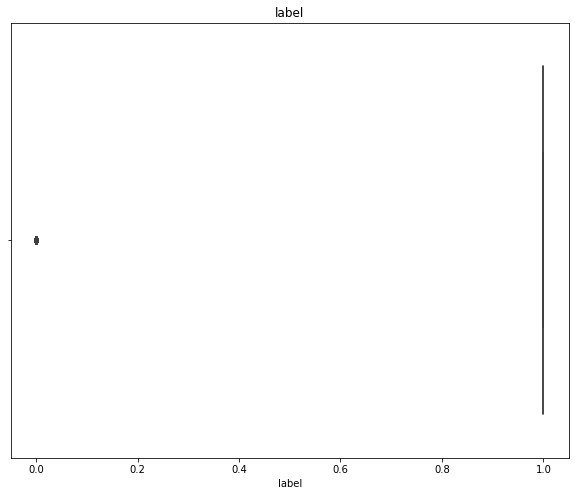

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


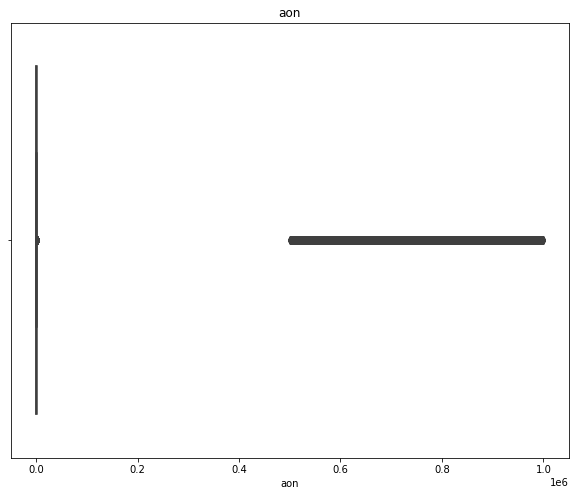

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


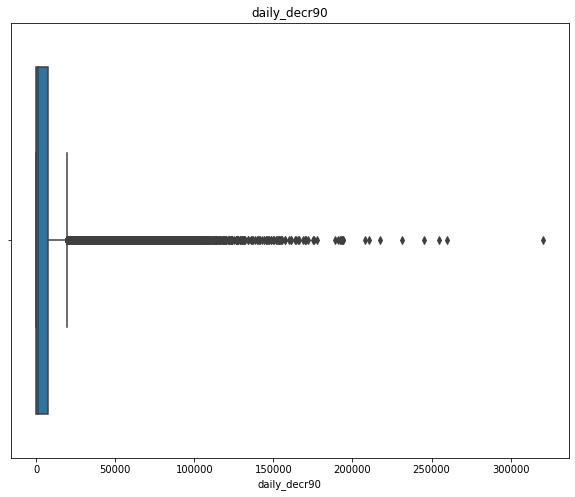

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


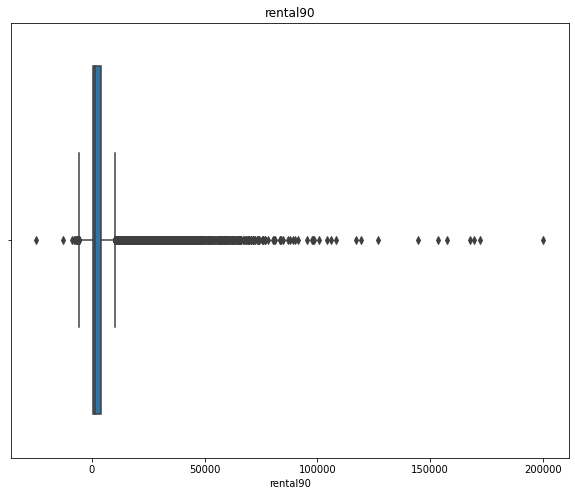

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


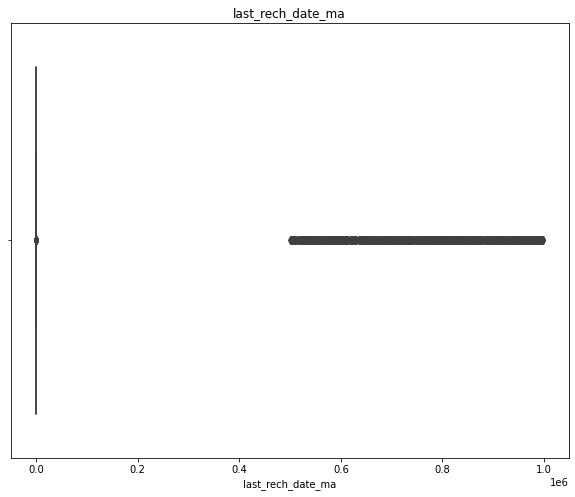

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


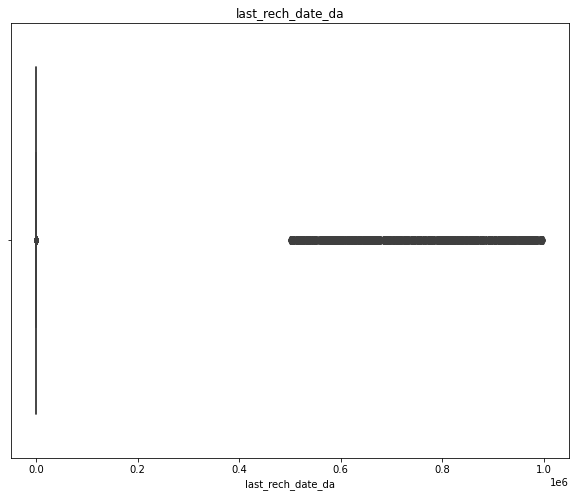

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


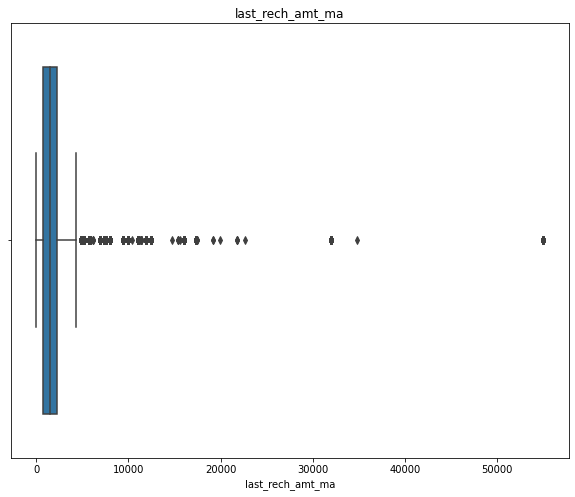

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


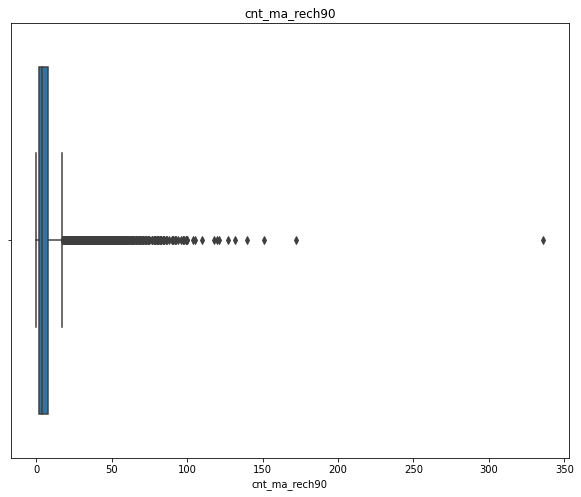

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


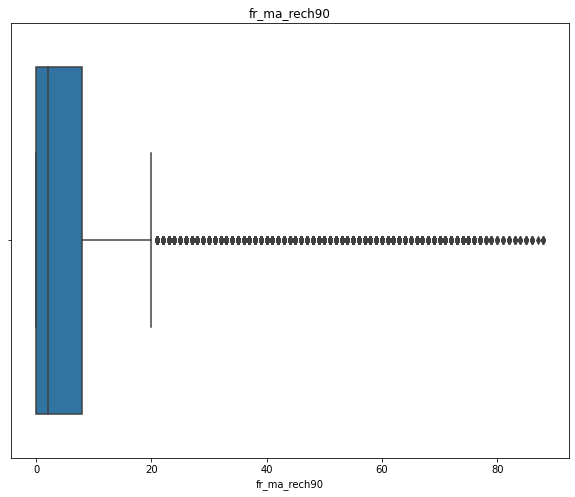

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


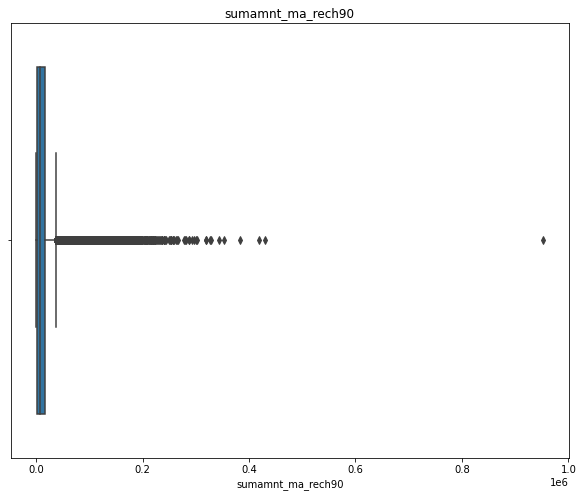

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


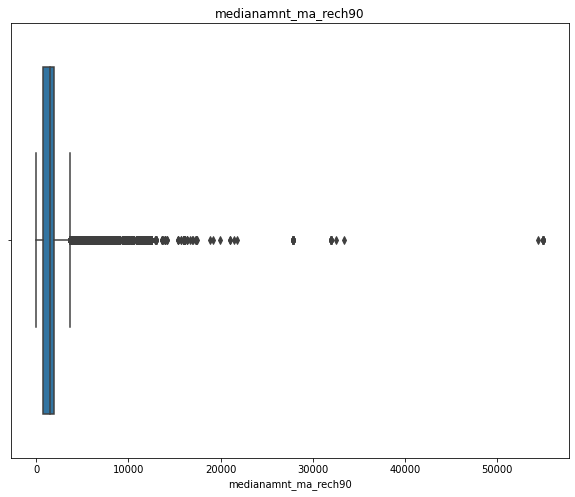

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


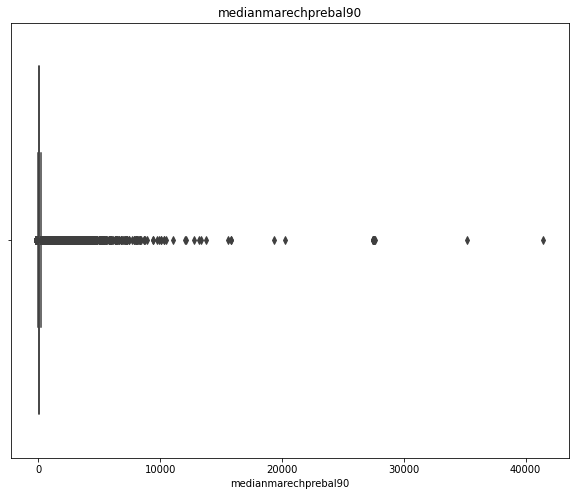

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


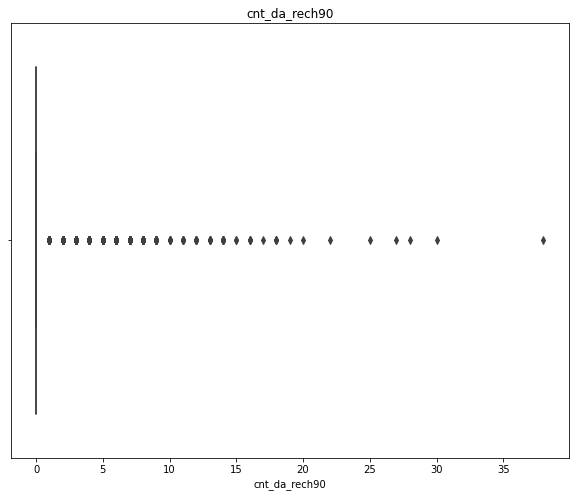

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


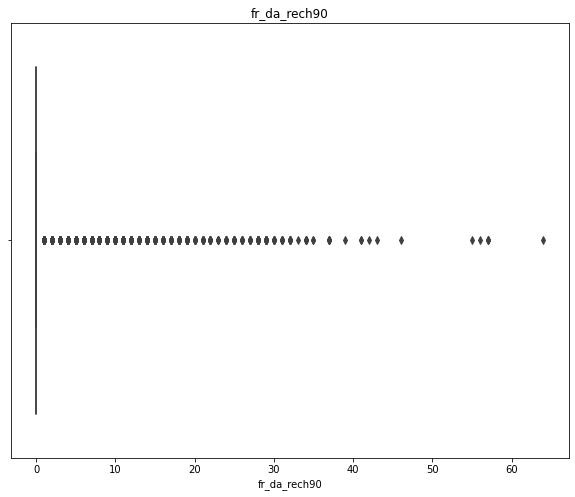

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


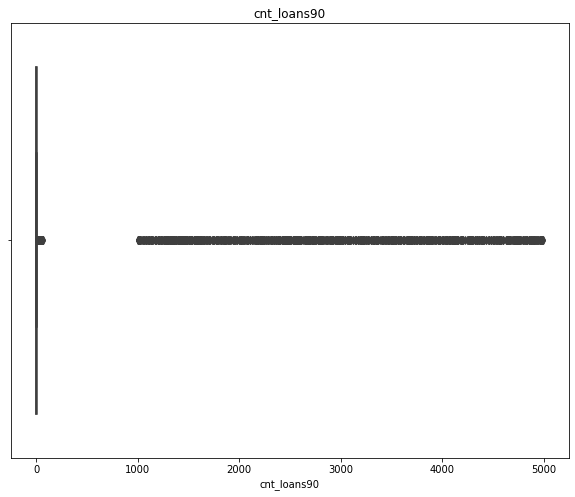

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


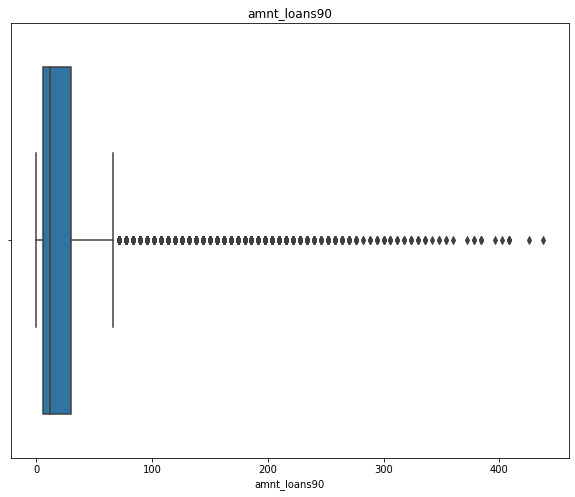

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


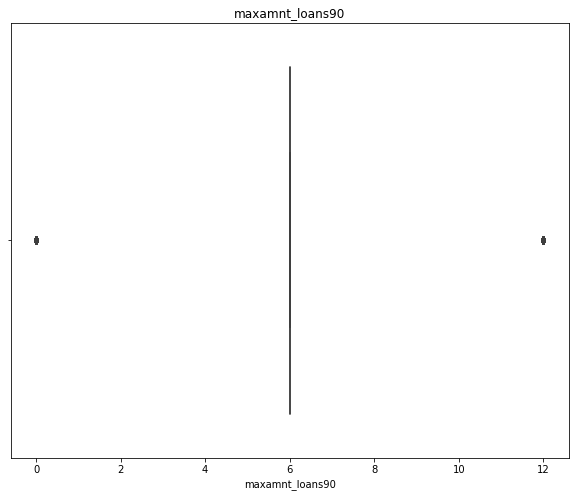

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


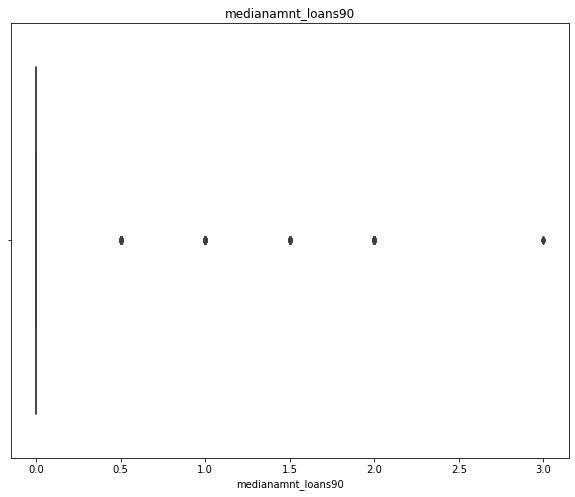

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


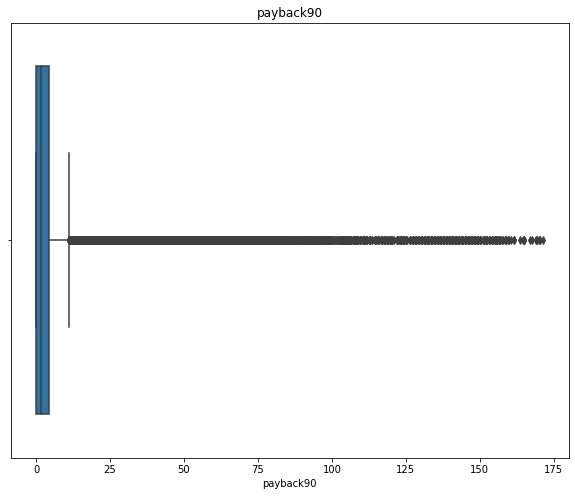

In [ ]:
# Boxplot of all the columns to check for outliers
for column in days_90.describe().columns:
  plt.figure(figsize = (10,8))
  sns.boxplot(days_90[column])
  plt.title(column)
  plt.show()

### As seen all the columns have outliers, but these outliers are natural to the data. As the data here is of a telecom company, and it includes information of recharge amounts, balances, payments. These variables have a high variance and are not very standardised.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


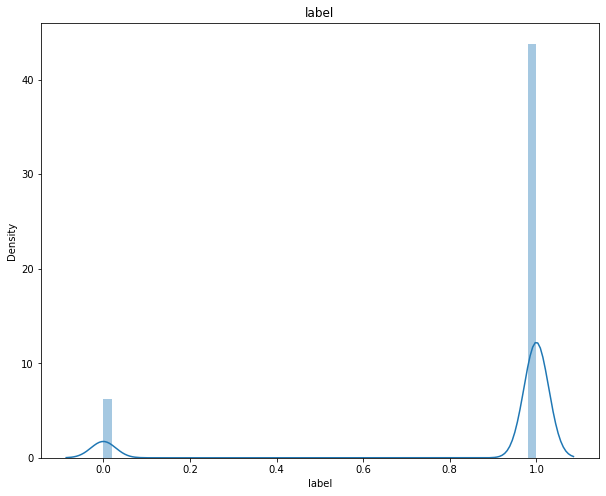

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


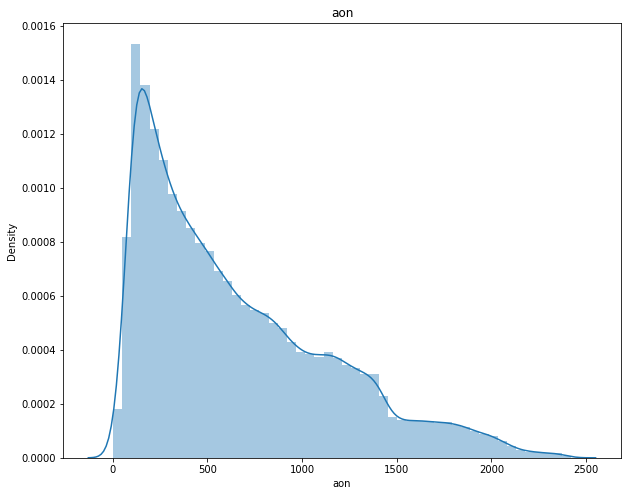

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


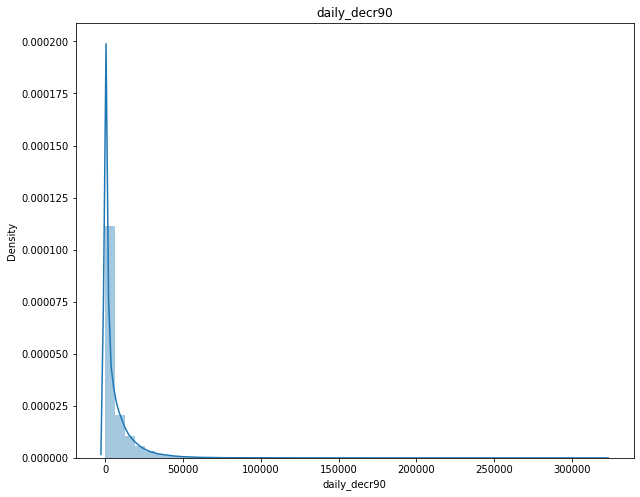

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


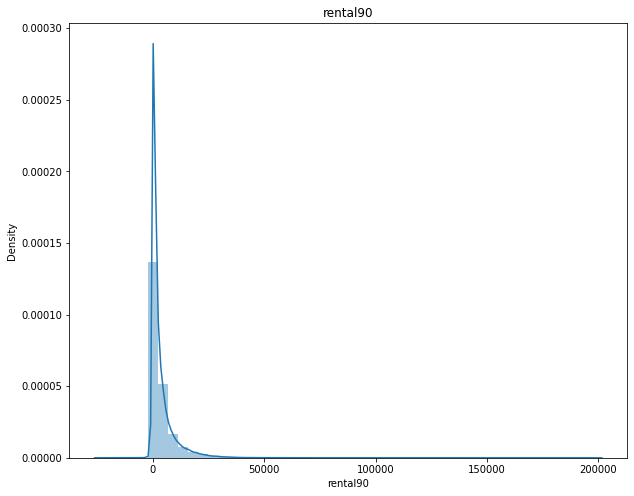

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


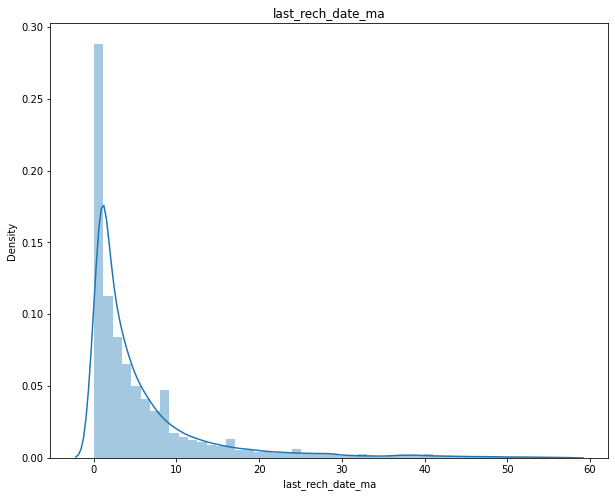

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


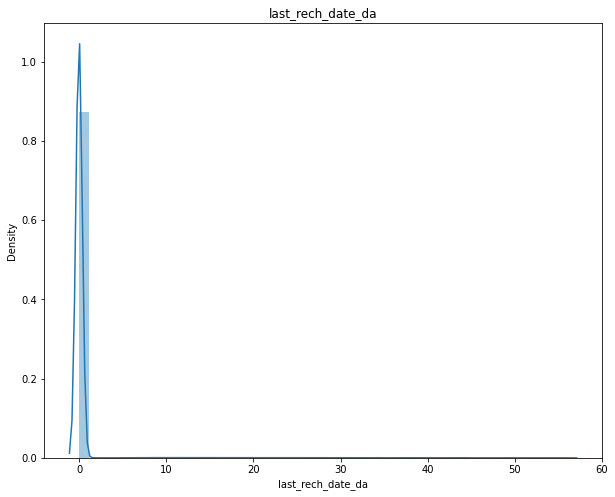

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


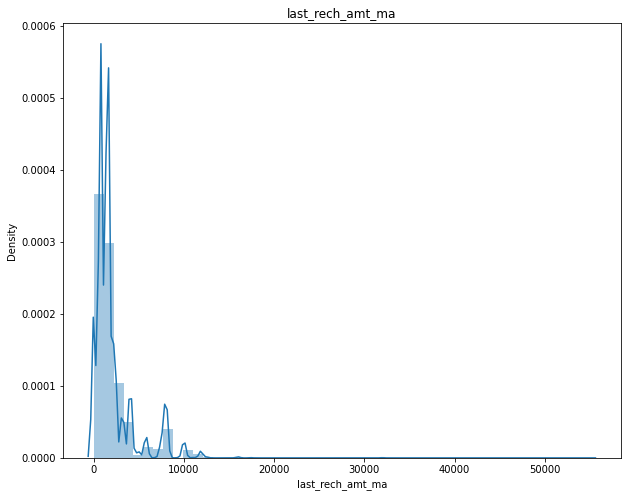

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


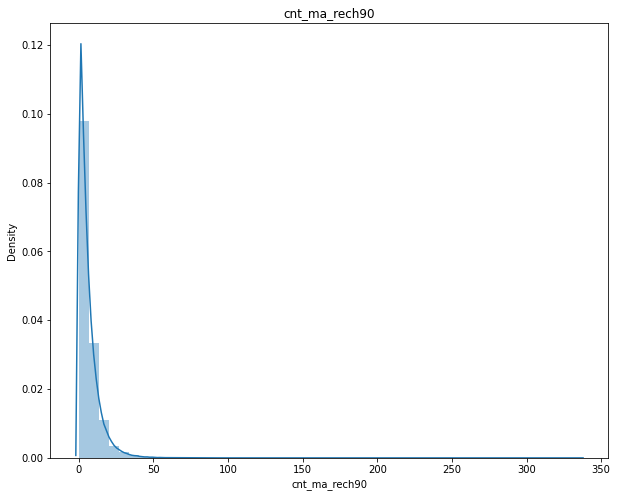

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


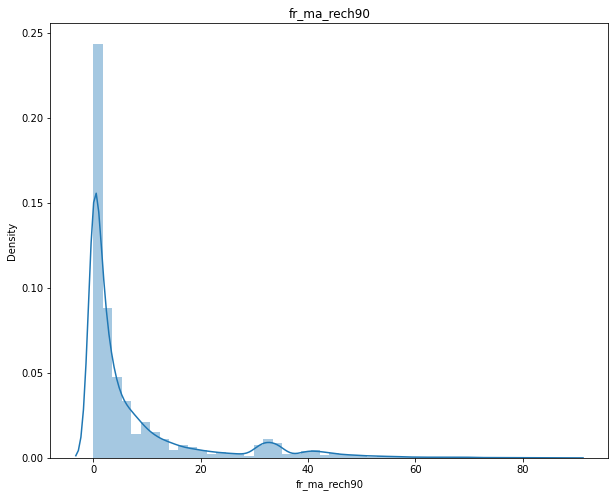

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


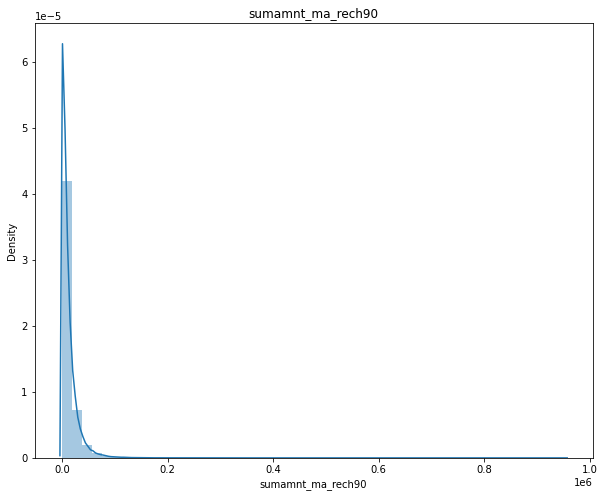

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


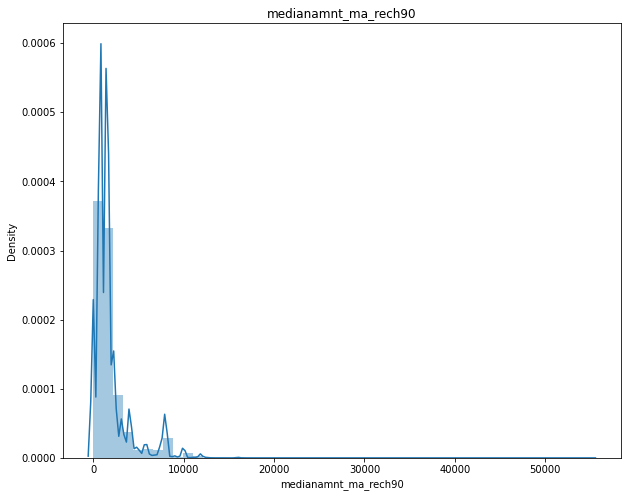

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


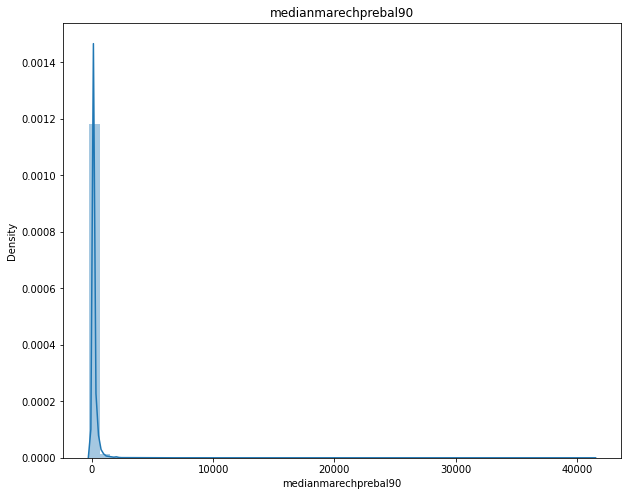

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


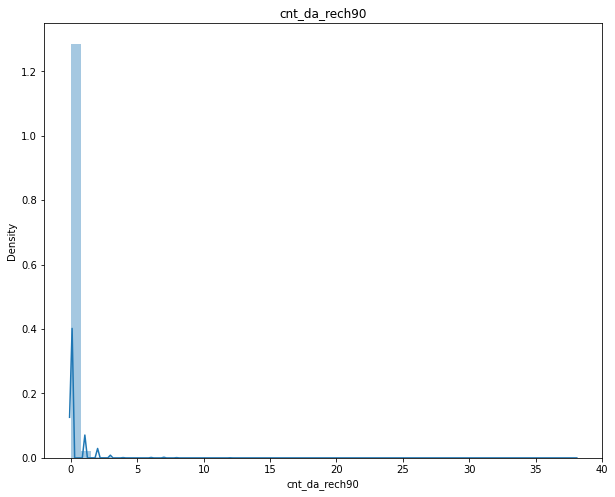

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


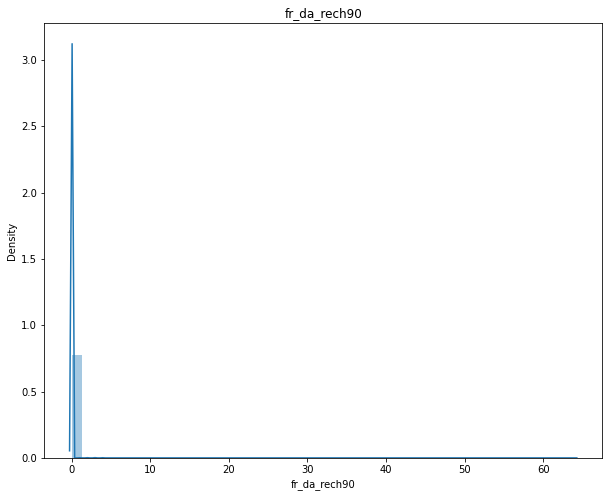

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


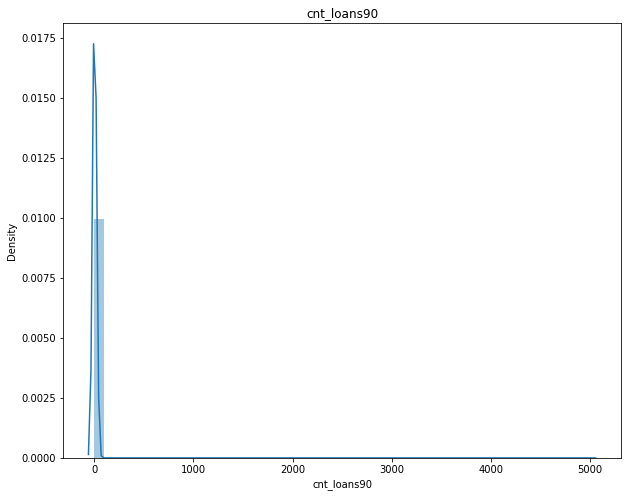

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


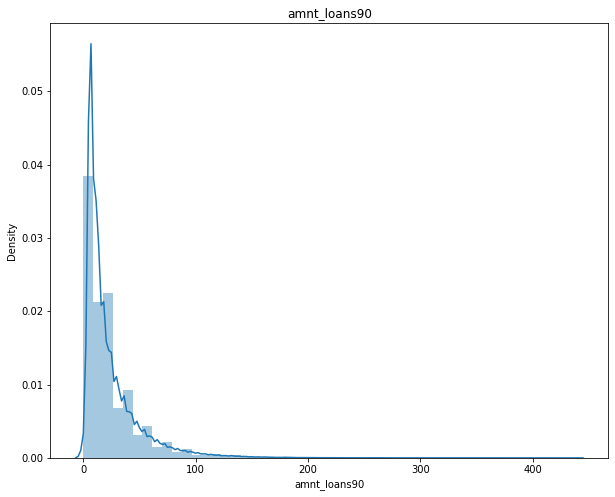

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


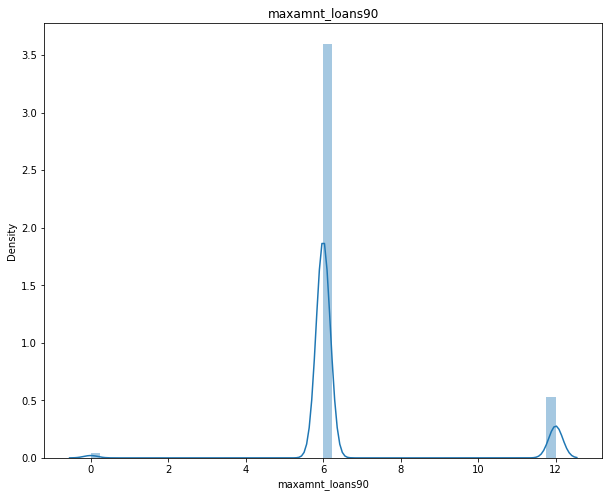

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


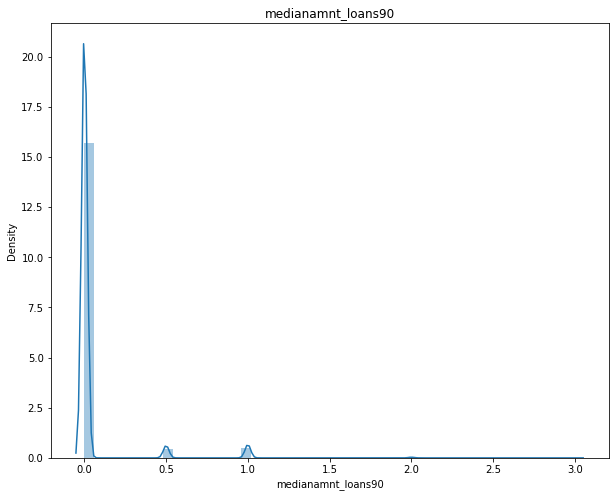

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


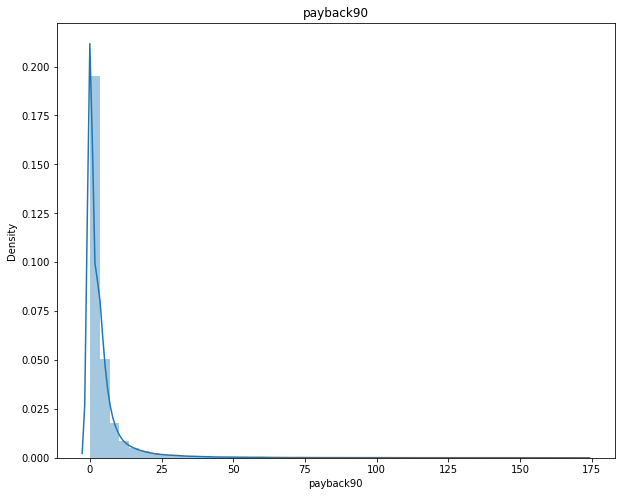

In [38]:
# Distribution plot of all the columns
for column in days_90.columns:
  plt.figure(figsize = (10,8))
  sns.distplot(days_90[column])
  plt.title(column)
  plt.show()

### Bivariate Analysis

In [97]:
days_90.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000
mean,0.876099,656.270251,6071.111144,3479.558877,5.937703,0.548112,2058.135718,6.325338,7.741231,12409.626197,1858.746038,91.168652,0.038487,0.045659,18.529091,23.716286,6.703742,0.045900,4.333194
std,0.329470,498.881131,10901.080705,5762.421115,8.331719,4.222207,2361.688741,7.180713,12.607205,16867.295711,2069.030491,358.906249,0.396270,0.949968,225.014104,26.484122,2.097279,0.200192,10.307376
min,0.000000,1.000000,0.000000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,244.000000,42.500000,301.110000,1.000000,0.000000,770.000000,2.000000,0.000000,2317.000000,773.000000,14.617500,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,520.000000,1500.000000,1333.430000,3.000000,0.000000,1539.000000,4.000000,2.000000,7283.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,964.000000,7788.019167,4200.697500,7.000000,0.000000,2309.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,2420.000000,320630.000000,200148.110000,57.000000,56.000000,55000.000000,336.000000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


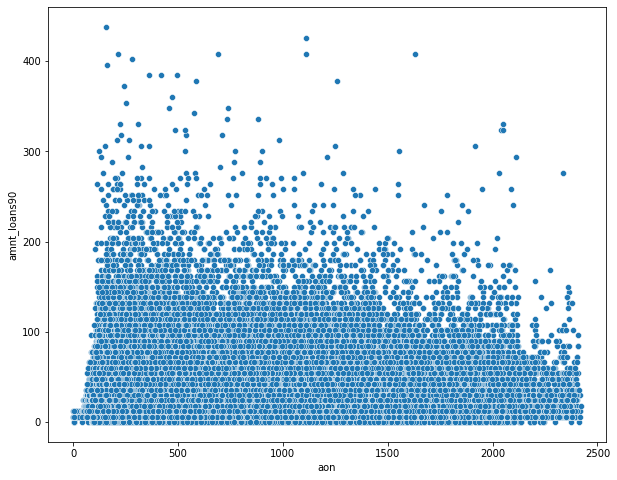

In [ ]:
# Plot between age on network and amount of loans taken in 90 days
plt.figure(figsize=(10,8))
sns.scatterplot(days_90['aon'], days_90['amnt_loans90'])

### As the age on network increases, the amount of loan taken by customers for 90 days reduces.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


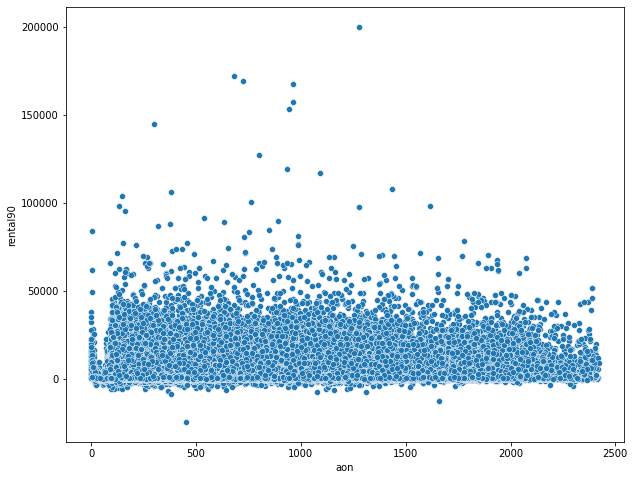

In [ ]:
# Plot between age on network and amount of loans taken in 90 days
plt.figure(figsize=(10,8))
sns.scatterplot(days_90['aon'], days_90['rental90'])

### Customers with a high age on network have lower negative account balances in the last 90 days compared to customers with lower age on network.

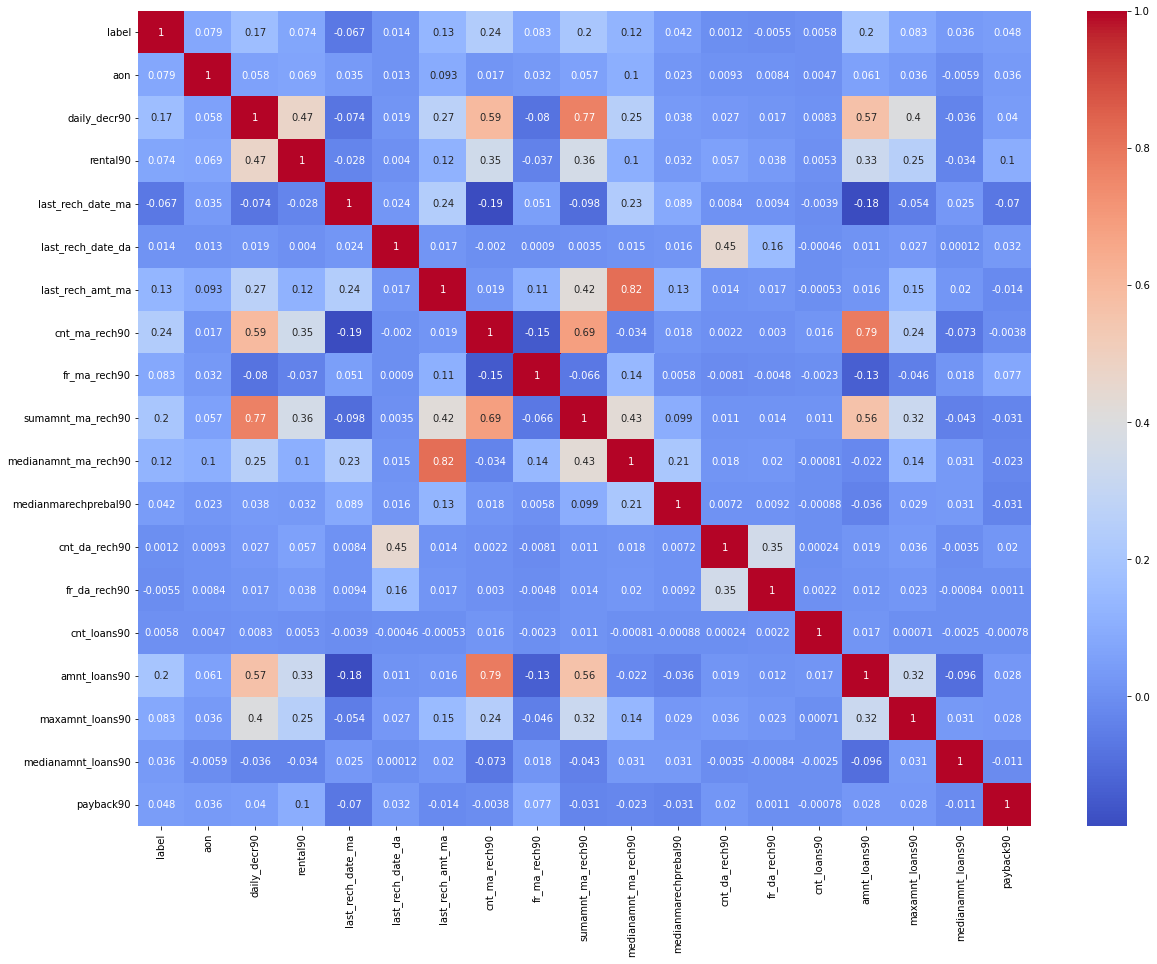

In [31]:
# Correlation of various features
plt.figure(figsize = (20,15))
sns.heatmap(days_90.corr(), annot = True, cmap = 'coolwarm')

## 3. Feature Transformation and Data Preparation

In [27]:
# Statistical description of the data
days_90.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,6082.544140,3483.406534,3756.125844,3712.204801,2064.452797,6.31543,7.716780,12396.218352,1864.595821,92.025541,0.041495,0.045712,18.520919,23.645398,6.703134,0.046077,4.321485
std,0.330519,75696.032666,10918.796572,5770.461279,53905.872857,53374.833299,2370.786034,7.19347,12.590251,16857.793882,2081.680664,369.215658,0.397556,0.951386,224.797423,26.469861,2.103864,0.200692,10.308108
min,0.000000,1.000000,0.000000,-24720.580000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.693333,300.260000,1.000000,0.000000,770.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,0.000000,1539.000000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,0.000000,2309.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,999860.755168,320630.000000,200148.110000,998650.377733,999171.809410,55000.000000,336.00000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


### Though outliers are natural to the data, there are some values that do not make sense logically, for example the max values in some columns related to the days show an extremely high value. This can be removed by capping. Capping can be done to a very high percentage so as to lose minimal data and at the same time remove unmeaningful values.

In [28]:
# Capping the data of certain columns
days_90.drop(days_90[days_90['aon'] > days_90['aon'].quantile(0.99)].index, axis = 0, inplace = True)
days_90.drop(days_90[days_90['last_rech_date_ma'] > days_90['last_rech_date_ma'].quantile(0.99)].index, axis = 0, inplace = True)
days_90.drop(days_90[days_90['last_rech_date_da'] > days_90['last_rech_date_da'].quantile(0.99)].index, axis = 0, inplace = True)

In [29]:
# Statistical description after capping
days_90.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90
count,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000,203444.000000
mean,0.876099,656.270251,6071.111144,3479.558877,5.937703,0.548112,2058.135718,6.325338,7.741231,12409.626197,1858.746038,91.168652,0.038487,0.045659,18.529091,23.716286,6.703742,0.045900,4.333194
std,0.329470,498.881131,10901.080705,5762.421115,8.331719,4.222207,2361.688741,7.180713,12.607205,16867.295711,2069.030491,358.906249,0.396270,0.949968,225.014104,26.484122,2.097279,0.200192,10.307376
min,0.000000,1.000000,0.000000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,244.000000,42.500000,301.110000,1.000000,0.000000,770.000000,2.000000,0.000000,2317.000000,773.000000,14.617500,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,520.000000,1500.000000,1333.430000,3.000000,0.000000,1539.000000,4.000000,2.000000,7283.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,964.000000,7788.019167,4200.697500,7.000000,0.000000,2309.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000
max,1.000000,2420.000000,320630.000000,200148.110000,57.000000,56.000000,55000.000000,336.000000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000


### The data now seems to have valid values in every column

### The data can now be split into independent and dependent variables. The data has values with different ranges and it can be scaled to have values in the same range.

In [44]:
# Splitting the data into independent and dependent variables
X = days_90.iloc[:,1:]
y = days_90.iloc[:,0]

In [45]:
# Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### As the dataset is imbalanced, oversampling in the form of SMOTE will be used.

In [46]:
# Oversampling using smote
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [47]:
# Distribution of classes after oversampling
print(f'Count of class 0 : {list(y).count(0)}')
print(f'Count of class 1 : {list(y).count(1)}')

Count of class 0 : 178237
Count of class 1 : 178237


### After oversampling it can be confirmed that the data now has same number of 0 and 1 classes, the imbalance has been removed.

## 4. Model Building

### Data is split into training and testing parts.

In [48]:
# Dividing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

In [49]:
# Shape of each sub division
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of X_test {X_test.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of X_train (285179, 18)
Shape of X_test (71295, 18)
Shape of y_train (285179,)
Shape of y_test (71295,)


In [50]:
# Instance of the classifiers
rf = RandomForestClassifier()
xgb = XGBClassifier()

### Working on the Random Forest Classifier

In [51]:
# Fitting the data into the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
# Train and test predictions
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [54]:
# Confusion matrix for training data
confusion_matrix(y_train, train_preds)

array([[142599,      6],
       [   906, 141668]])

In [55]:
# Confusion matrix for test data
confusion_matrix(y_test, test_preds)

array([[33162,  2470],
       [ 2136, 33527]])

In [56]:
# Classification report for the training data
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    142605
           1       1.00      0.99      1.00    142574

    accuracy                           1.00    285179
   macro avg       1.00      1.00      1.00    285179
weighted avg       1.00      1.00      1.00    285179



In [57]:
# Classification report for test  data
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     35632
           1       0.93      0.94      0.94     35663

    accuracy                           0.94     71295
   macro avg       0.94      0.94      0.94     71295
weighted avg       0.94      0.94      0.94     71295



### As seen the model is overfitting.

### Working on the XGB classifier

In [58]:
# Fitting data on the XGB Classifier
xgb.fit(X_train, y_train)

XGBClassifier()

In [84]:
# Train and test predictions using the XGB Classifier
xgb_train_preds = xgb.predict(X_train)
xgb_test_preds = xgb.predict(X_test)

In [85]:
# Confusion matrix of the XGB Classifier train data
confusion_matrix(y_train, xgb_train_preds)

array([[127877,  14728],
       [ 20262, 122312]])

In [86]:
# Confusion matrix of XGB Classifier test data
confusion_matrix(y_test, xgb_test_preds)

array([[31946,  3686],
       [ 5195, 30468]])

In [87]:
# XGB classification report of train data
print(classification_report(y_train, xgb_train_preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    142605
           1       0.89      0.86      0.87    142574

    accuracy                           0.88    285179
   macro avg       0.88      0.88      0.88    285179
weighted avg       0.88      0.88      0.88    285179



In [88]:
# XGB classification report of test data
print(classification_report(y_test, xgb_test_preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     35632
           1       0.89      0.85      0.87     35663

    accuracy                           0.88     71295
   macro avg       0.88      0.88      0.88     71295
weighted avg       0.88      0.88      0.88     71295



### Comparing both the baseline models it is seen that the Random Forest Classifier overfits compared to the XGBoost Classifier, but the Random Forest Classifier performs better on the test data than the XGB Classifier

## 5. Model Tuning

### Comparing the baseline models it was seen that the Random Forest Classifier perfomed better but was overfitting. Hyperparameter tuning can be done to minimize the overfitting. Random search will be used as a hyperparameter tuning technique.

In [89]:
# Hyperparameters for tuning
param_dict = {'n_estimators' : [150,200], 
              'criterion':['gini'], 
              'max_depth' : [22,24], 
              'min_samples_split' : [7,8],
              'min_samples_leaf' : [4,6]}

In [76]:
# Instane of the Random Search CV 
random = RandomizedSearchCV(estimator = rf, param_distributions= param_dict, scoring = 'recall', cv = 3)

In [77]:
# Fitting data into the Random Search CV model
random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [22, 24],
                                        'min_samples_leaf': [4, 6],
                                        'min_samples_split': [7, 8],
                                        'n_estimators': [150, 200]},
                   scoring='recall')

In [90]:
# Best Parameters
random.best_params_

{'criterion': 'gini',
 'max_depth': 24,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [91]:
# Train and test predicitions after hyperparameter tuning
rs_train_preds = random.predict(X_train)
rs_test_preds = random.predict(X_test)

In [92]:
# Classification report on train data after hyperparameter tuning
print(classification_report(y_train, rs_train_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    142605
           1       0.96      0.94      0.95    142574

    accuracy                           0.95    285179
   macro avg       0.95      0.95      0.95    285179
weighted avg       0.95      0.95      0.95    285179



In [93]:
# Classification report on test data after hyperparameter tuning
print(classification_report(y_test, rs_test_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     35632
           1       0.92      0.92      0.92     35663

    accuracy                           0.92     71295
   macro avg       0.92      0.92      0.92     71295
weighted avg       0.92      0.92      0.92     71295



In [94]:
# Confusion matrix on train predicitons after hyperparameter tuning
confusion_matrix(y_train, rs_train_preds)

array([[136911,   5694],
       [  8065, 134509]])

In [95]:
# Confusion matrix on test predictions after hyperparameter tuning.
confusion_matrix(y_test, rs_test_preds)

array([[32924,  2708],
       [ 2763, 32900]])

### After hyperparameter tuning it can be seen that, the overfitting has reduced. The performance on test data has approximately remained the same.

# **CONCLUSION**

### The main objective of this problem was to predict default EMI payments. A model is successfully built which predicts default payments with a score of 93% recall. 

### The project has been conducted in 5 major steps:
### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Feature Transformation and Data Preparation
### 4. Model Building
### 5. Model Evaluation

### This project can have a huge impact for the telecom company, predicting default EMI payments, can help the company take necessary action against a particular customer. If the model predicts that a particular customer might default his EMI payments, the company can immediately take action on the customer before the losses pile up.